**Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Import Data**

In [2]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [5]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [6]:
for i in df.columns:
  print(df[i].value_counts())
  print('--'*50)

47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64
----------------------------------------------------------------------------------------------------
M    104
F     96
Name: Sex, dtype: int64
----------------------------------------------------------------------------------------------------
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
----------------------------------------------------------------------------------------------------
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
-----------------------------------------------------

**Data Visualization**

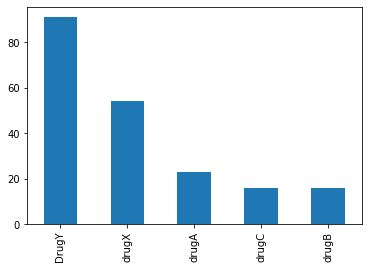

In [7]:
df.Drug.value_counts().plot(kind='bar')
plt.show()

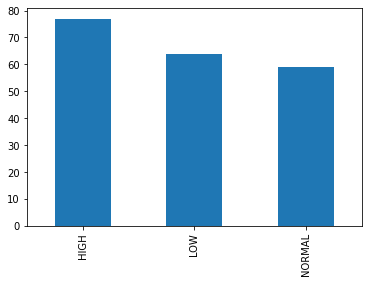

In [8]:
df.BP.value_counts().plot(kind='bar')
plt.show()

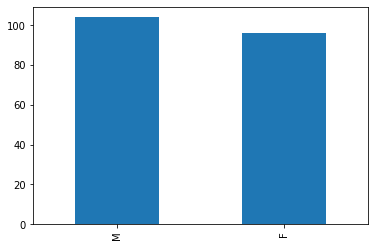

In [9]:
df.Sex.value_counts().plot(kind='bar')
plt.show()

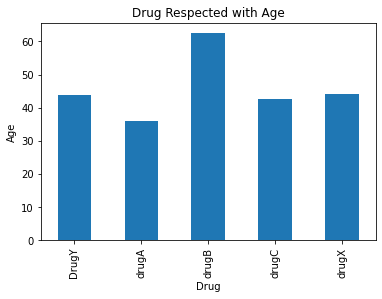

In [10]:
group_with_age = df.groupby('Drug')['Age'].mean().plot(kind='bar')
plt.title('Drug Respected with Age')
plt.ylabel('Age')
plt.show()

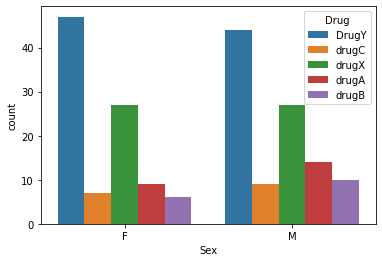

In [11]:
sns.countplot(x='Sex',hue='Drug',data=df)
plt.show()

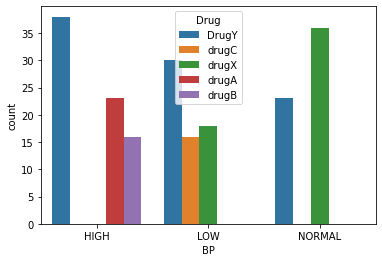

In [12]:
sns.countplot(x='BP',hue='Drug',data=df)
plt.show()

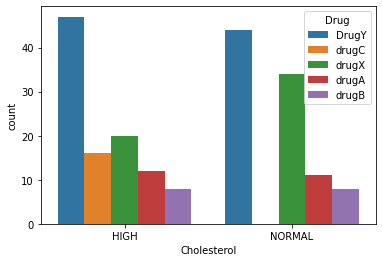

In [13]:
sns.countplot(x='Cholesterol',hue='Drug',data=df)
plt.show()

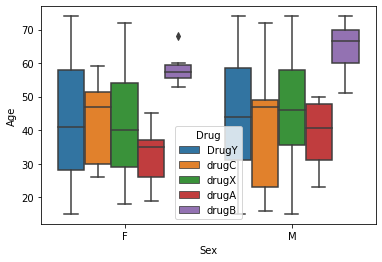

In [14]:
sns.boxplot(x='Sex',y='Age',hue='Drug',data=df)
plt.show()

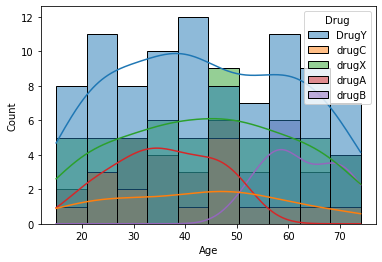

In [15]:
sns.histplot(x='Age',hue='Drug',bins=10,kde=True,data=df)
plt.show()

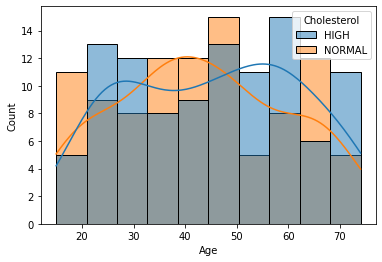

In [16]:
sns.histplot(x='Age',hue='Cholesterol',bins=10,kde=True,data=df)
plt.show()

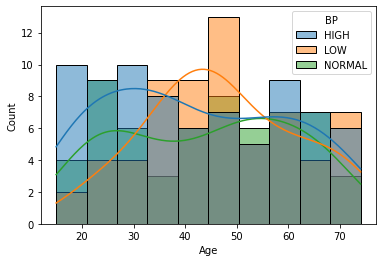

In [17]:
sns.histplot(x='Age',hue='BP',bins=10,kde=True,data=df)
plt.show()

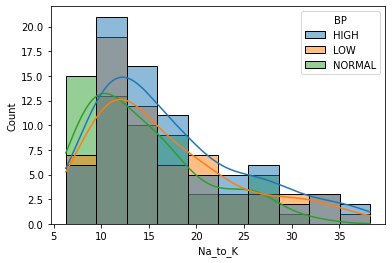

In [18]:
sns.histplot(x='Na_to_K',hue='BP',bins=10,kde=True,data=df)
plt.show()

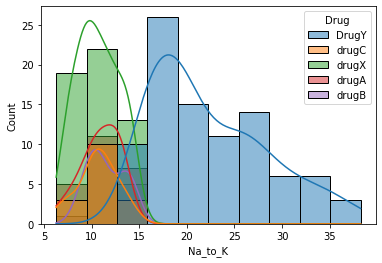

In [19]:
sns.histplot(x='Na_to_K',hue='Drug',bins=10,kde=True,data=df)
plt.show()

**Finding Correlation**

**Convert Categorical Data into Numeric Data**

In [20]:
from sklearn.preprocessing import LabelEncoder
df.Drug = LabelEncoder().fit_transform(df.Drug)

In [21]:
from sklearn.preprocessing import OneHotEncoder
df['BP'] = OneHotEncoder(sparse=False).fit_transform(df[['BP']])
df['Cholesterol'] = OneHotEncoder(sparse=False).fit_transform(df[['Cholesterol']])

**Standard Scaler**

In [22]:
from sklearn.preprocessing import StandardScaler
df['Na_to_K'] = StandardScaler().fit_transform(df['Na_to_K'].values.reshape(-1,1))

**Male ==>1 & Female ==>0**

In [23]:
df.Sex.replace({'F':0,'M':1},inplace=True)

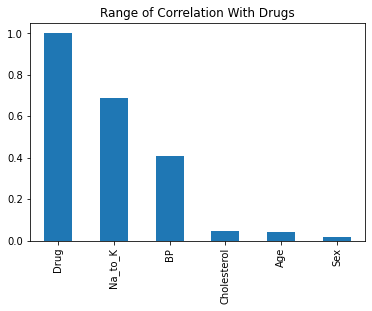

In [24]:
cor = df.corr().abs()
cor['Drug'].sort_values(ascending=False).plot(kind='bar')
plt.title('Range of Correlation With Drugs')
plt.show()

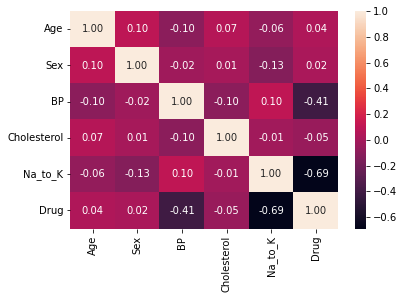

In [25]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

**Convert Data into Target and Independent Variables**

In [26]:
X = df.drop(columns=['Drug'])
y = df['Drug']

**Spliting Data into train and test dataset for model**

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=123)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

**Logistic Regression**

Accuracy Score of Logistic Model=> 0.925
Classification Report of Logistic Model=>
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         3
           4       0.75      1.00      0.86         9

    accuracy                           0.93        40
   macro avg       0.75      0.80      0.77        40
weighted avg       0.87      0.93      0.89        40

Confusion Matrix : 


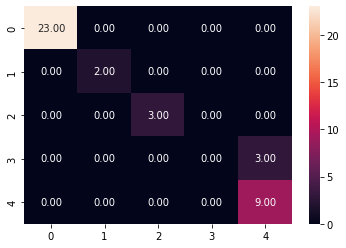

In [29]:
model02 = LogisticRegression().fit(X_train,y_train)
print('Accuracy Score of Logistic Model=>',accuracy_score(y_test,model02.predict(X_test)))
print('Classification Report of Logistic Model=>\n',classification_report(y_test,model02.predict(X_test)))
print('Confusion Matrix : ')
sns.heatmap(confusion_matrix(y_test,model02.predict(X_test)),annot=True,fmt='.2f')
plt.show()

**Cross Validation**

In [31]:
from sklearn.model_selection import cross_val_score
print('Logistic Model Cross Valiaditation=>',cross_val_score(model02,X_train,y_train,cv=10))
print('__'*50)

Logistic Model Cross Valiaditation=> [0.9375 0.9375 0.9375 0.9375 0.875  0.9375 0.875  0.75   0.875  0.75  ]
____________________________________________________________________________________________________


**Conclusion**

**Standard Scaler , OneHot Encoding , Label Encoder Provides Highly Accuracy**

Acuuracy of Logistic Regression ==> 0.93

**1.What is Feature Scaling?**<br>
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. Just to give you an example — if you have multiple independent variables like age, salary, and height; With their range as (18–100 Years), (25,000–75,000 Euros), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range, for example- centered around 0 or in the range (0,1) depending on the scaling technique.

In order to visualize the above, let us take an example of the independent variables of alcohol and Malic Acid content in the wine dataset from the “Wine Dataset” that is deposited on the UCI machine learning repository. Below you can see the impact of the two most common scaling techniques (Normalization and Standardization) on the dataset.<br>
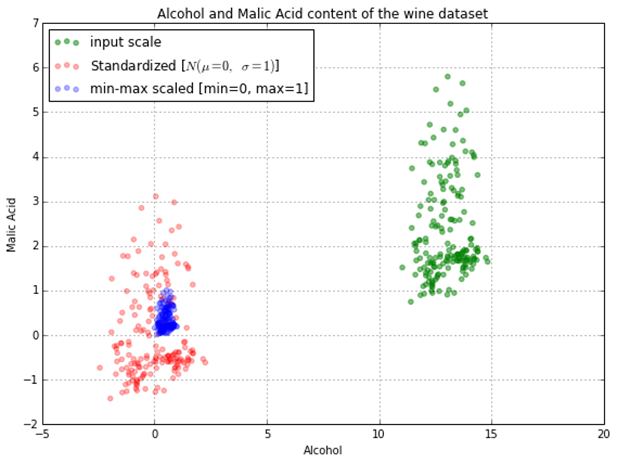

**Methods for Scaling**

Now, since you have an idea of what is feature scaling. Let us explore what methods are available for doing feature scaling. Of all the methods available, the most common ones are:

**Normalization**<br>
Also known as min-max scaling or min-max normalization, it is the simplest method and consists of rescaling the range of features to scale the range in [0, 1]. The general formula for normalization is given as:


Here, max(x) and min(x) are the maximum and the minimum values of the feature respectively.

We can also do a normalization over different intervals, e.g. choosing to have the variable laying in any [a, b] interval, a and b being real numbers. To rescale a range between an arbitrary set of values [a, b], the formula becomes:


**Standardization**

Feature standardization makes the values of each feature in the data have zero mean and unit variance. The general method of calculation is to determine the distribution mean and standard deviation for each feature and calculate the new data point by the following formula:


Here, σ is the standard deviation of the feature vector, and x̄ is the average of the feature vector.

**Scaling to unit length**<br>
The aim of this method is to scale the components of a feature vector such that the complete vector has length one. This usually means dividing each component by the Euclidean length of the vector:


In addition to the above 3 widely-used methods, there are some other methods to scale the features viz. Power Transformer, Quantile Transformer, Robust Scaler, etc. For the scope of this discussion, we are deliberately not diving into the details of these techniques.

The million-dollar question: Normalization or Standardization
If you have ever built a machine learning pipeline, you must have always faced this question of whether to Normalize or to Standardize. While there is no obvious answer to this question, it really depends on the application, there are still a few generalizations that can be drawn.

Normalization is good to use when the distribution of data does not follow a Gaussian distribution. It can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors.

In Neural Networks algorithm that require data on a 0–1 scale, normalization is an essential pre-processing step. Another popular example of data normalization is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range).

Standardization can be helpful in cases where the data follows a Gaussian distribution. Though this does not have to be necessarily true. Since standardization does not have a bounding range, so, even if there are outliers in the data, they will not be affected by standardization.

In clustering analyses, standardization comes in handy to compare similarities between features based on certain distance measures. Another prominent example is the Principal Component Analysis, where we usually prefer standardization over Min-Max scaling since we are interested in the components that maximize the variance.

There are some points which can be considered while deciding whether we need Standardization or Normalization

Standardization may be used when data represent Gaussian Distribution, while Normalization is great with Non-Gaussian Distribution
Impact of Outliers is very high in Normalization

To conclude, you can always start by fitting your model to raw, normalized, and standardized data and compare the performance for the best results.

**2.Feature Selection and Dimensionality Reduction**

**Feature Selection vs Dimensionality Reduction**<br>
Often, feature selection and dimensionality reduction are grouped together (like here in this article). While both methods are used for reducing the number of features in a dataset, there is an important difference.

Feature selection is simply selecting and excluding given features without changing them.

Dimensionality reduction transforms features into a lower dimension.

we will explore the following feature selection and dimensionality reduction techniques:

**Feature Selection**
Remove features with missing values<br>
Remove features with low variance<br>
Remove highly correlated features<br>
Univariate feature selection<br>
Recursive feature elimination<br>
Feature selection using SelectFromModel<br>
**Dimensionality Reduction**<br>
PCA